# Assignment 2-1: Univariate Linear Regression

本题要求完成单变量线性回归。由于原笔记本格式不够美观，重新整理如下。

> 注：Theory 部分为笔者自己编辑，Implementation 部分基于提供的代码进行修改。

## Theory

The target of the problem is to find a best-fit linear equation $f(x)=\vec{w}x+b$, which, in the univariate case, can be simplified to $f(x)=wx+b$.

We use $\Theta = \{w,\,b\}$ in the code to represent the parameters, and define $f_{\Theta_0}(x)=w_0 x + b_0$ where $\Theta_0 = \{w_0, b_0\}$.

### Cost function

A cost function is defined by how much the line *deviates* the points. We use the most common type of cost function here, the **mean squared error**, defined by the following equation:

$$\mathcal{J}(\Theta)=\dfrac{1}{2n}\sum_{i=1}^{n}\left(f_\Theta(x^i)-y^i\right)^2$$

For a Gaussian-distributed dataset, we can augment pattern $x$ with a bias of $1$ to model $\mu = 1$, where $\mu$ is the **rooted mean**. Note that $x^i$ here does not mean $x$ to the power of $i$, but a notation of the $i$-th element.

### Gradients

The gradient with respect to the model parameters $\Theta=\left\{w, b\right\}$, use chain rule:

$$
\frac{\partial \mathcal{J}(\Theta)}{\partial \theta_{j}}=\frac{1}{m} \sum_{i=1}^{m}\left(f_{\Theta}\left(x^{i}\right)-y^{i}\right) x_j^{i}
$$

where $j$ indexes a particular parameter, in this univariate case $j\in\{0, 1\}$, where $j_0 = b, j_1 = w$. This leads us to utilize the following two specific gradients:

$$
\begin{cases}\begin{aligned}
\frac{\partial \mathcal{J}(\Theta)}{\partial w} &=\frac{1}{m} \sum_{i=1}^{m}\left(f_{\Theta}\left(x^{i}\right)-y^{i}\right) x^{i} \\
\frac{\partial \mathcal{J}(\Theta)}{\partial b} &=\frac{1}{m} \sum_{i=1}^{m}\left(f_{\Theta}\left(x^{i}\right)-y^{i}\right)
\end{aligned}\end{cases}
$$

### Learning process

The learning process is to let $\Theta = \{w,\, b\}$ to descend along the gradient so as to minimize the cost function $\mathcal{J}$.

For each iteration, the model needs to be updated as follows:

$$
\theta_j = \theta_j - \alpha \frac{\partial \mathcal{J}(\Theta)}{\partial \theta_j}
$$

## Implementation

In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

'''
This problem is adapted from the course materials of IST 597 at Penn State University.
Thanks to the contribution of Alexander G. Ororbia II.
'''

alpha = 0.015 # Learning rate
eps = 1e-6 # Convergence criterion
n_epoch = 1000 # Number of epochs

In [2]:
def regress(X, theta):
    # Predict y for each X and theta
    m = np.shape(X)[0]
    b = theta[0]
    w = theta[1]
    y_hat = np.repeat(b[None,:], m, axis = 0) + np.dot(X, w.transpose())
    return y_hat

def computeCost(X, y, theta):
    # Compute J(f_theta)
    m = np.shape(y)[0]
    y_hat = regress(X, theta)
    loss = 1/(2*m)*np.sum(np.square(y_hat - y))
    return loss

def computeGrad(X, y, theta): 
    # Compute gradients
    #################################
    dL_db = (np.sum(regress(X, theta) - y)) / (len(X))
    dL_dw = (np.dot(X.T, (regress(X, theta) - y))) / (len(X))
    return (dL_db, dL_dw)
    #################################

In [3]:
# Load the data
data = pd.read_csv('ASSIGNMENT_2_FILES/prob1.dat', header=None, names=['X', 'Y']) 

# Describe the data
print(data.describe())

# Convert the data into NumPy arrays
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 
X = np.array(X.values)  
y = np.array(y.values)

# Initial parameters of the model
w = np.random.randn(1, X.shape[1])
b = np.array([0])
theta = (b, w)

               X          Y
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


In [19]:
# Before learning
L = computeCost(X, y, theta)
print("-1 L = {0}".format(L))
L_best = L
i = 0
cost = [L] # Record of history costs

# Main learning code
while (i < n_epoch):
    dL_db, dL_dw = computeGrad(X, y, theta)
    b = theta[0]
    w = theta[1]
    #################################
    b = b - alpha * dL_db
    w = w - alpha * dL_dw
    theta = (b, w)
    L = computeCost(X, y, theta)
    if cost[-1] - L < eps:
        break
    cost.append(L)
    if i % 100 == 0:  # print every 20 epochs
        print(" {0} L = {1}".format(i, L))
    #################################
    i += 1

print("w = %.5f" % w[0][0])
print("b = %.5f" % b[0])
print("Error = %.5f" % computeCost(X, y, (b, w)))

-1 L = 4.477150550940799
w = 1.18859
b = -3.85154
Error = 4.47715


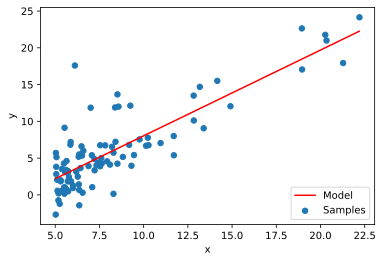

In [5]:
# Figure showing sample points and regression line
plt.plot(X, regress(X, theta), color = 'r', label="Model")
plt.scatter(X[:,0], y, s=30, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.savefig("ASSIGNMENT_2_FILES/" + str(alpha) + "_fit.png")
plt.show()

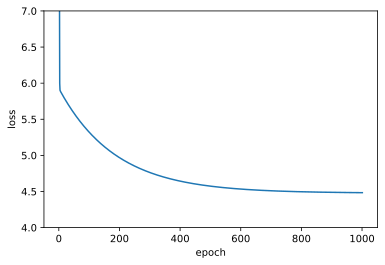

In [12]:
# Figure showing how loss has changed
plt.plot([i+1 for i in range(len(cost))], cost, label = "loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(4, 7)
plt.savefig("ASSIGNMENT_2_FILES/" + str(alpha) + "_loss.png")
plt.show()